In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


class Directed_Sandpile:
    def __init__(self, longitudinal_size, transverse_size):
        self.longitudinal_size = longitudinal_size
        self.transverse_size = transverse_size
        self.grid = np.zeros(longitudinal_size * transverse_size)        
        size = longitudinal_size * transverse_size
        self.toppling_matrix = np.zeros((size, size), dtype=int)
        np.fill_diagonal(self.toppling_matrix, 3)        
        self.data = []
        # Set -1 for the downward neighbor (next row in the same column)
        row_indices = np.arange(size - transverse_size)  # Exclude the last row
        downward_indices = row_indices + transverse_size
        self.toppling_matrix[row_indices, downward_indices] = -1
        
        rightward_indices = (downward_indices + 1) % self.transverse_size \
                            + (downward_indices // self.transverse_size) * self.transverse_size
        rightward_indices = np.where(
            (downward_indices % self.transverse_size) != (self.transverse_size - 1), 
            downward_indices + 1, 
            downward_indices - (self.transverse_size - 1)
        )
        self.toppling_matrix[row_indices, rightward_indices] = -1

        # Set -1 for the leftward periodic neighbor of the downward neighbor
        leftward_indices = (downward_indices - 1) % self.transverse_size \
                           + (downward_indices // self.transverse_size) * self.transverse_size
        leftward_indices = np.where(
            (downward_indices % self.transverse_size) != 0, 
            downward_indices - 1, 
            downward_indices + (self.transverse_size - 1)
        )
        self.toppling_matrix[row_indices, leftward_indices] = -1

    def grid_plotter(self):
        return self.grid.reshape((self.longitudinal_size, self.transverse_size))

    def add_grain(self, x, y):
        """Add a grain of sand to the grid at position (x, y)."""
        index = x * self.transverse_size + y
        self.grid[index] += 1

    def topple(self):
        """Perform toppling until the grid stabilizes."""
        num_sites = 0
        while np.any(self.grid > 2):
            unstable_indices = np.where(self.grid >= 3)[0]  # Get indices where height >= 3
            num_sites += len(unstable_indices)
            for idx in unstable_indices:
                self.grid -= self.toppling_matrix[idx]  # Apply toppling rule
        self.data.append(num_sites)

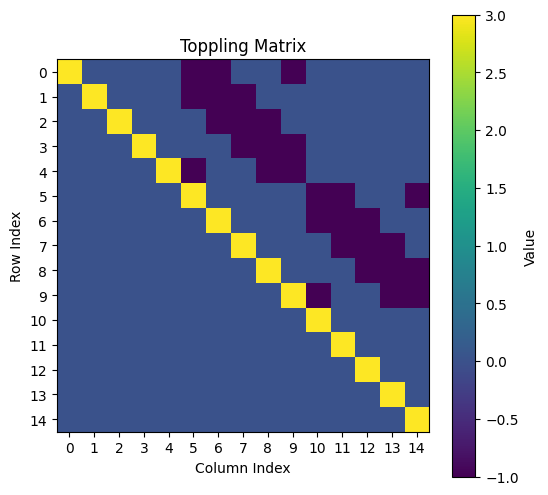

In [4]:
import matplotlib.pyplot as plt
a = Directed_Sandpile(3,5)

# Assuming `a.toppling_matrix` exists and is the matrix to visualize
plt.figure(figsize=(6, 6))
plt.imshow(a.toppling_matrix, cmap="viridis", origin="upper")
plt.colorbar(label="Value")

# Set ticks at each unit
size = a.toppling_matrix.shape[0]
plt.xticks(ticks=np.arange(size), labels=np.arange(size))
plt.yticks(ticks=np.arange(size), labels=np.arange(size))

plt.title("Toppling Matrix")
plt.xlabel("Column Index")
plt.ylabel("Row Index")
plt.grid(False)  # Optional: Turn off grid lines for a cleaner look
plt.show()



In [5]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib.colors as mcolors

# Function to clear all files in a directory
def clear_directory(directory):
    if os.path.exists(directory):
        for filename in os.listdir(directory):
            file_path = os.path.join(directory, filename)
            try:
                if os.path.isfile(file_path) or os.path.islink(file_path):
                    os.unlink(file_path)  # Remove the file
                elif os.path.isdir(file_path):
                    os.rmdir(file_path)  # Remove the directory if it's empty
            except Exception as e:
                print(f"Failed to delete {file_path}: {e}")

# Assuming the Directed_Sandpile class is already defined
sandpile = Directed_Sandpile(15,30)
num_grains = 500 # Adjust for desired number of frames
coordinates = [[0, random.randint(0, sandpile.transverse_size - 1)] for _ in range(num_grains)]

# Create directory to save frames
output_dir = "sandpile_frames"
os.makedirs(output_dir, exist_ok=True)

# Clear the directory
clear_directory(output_dir)

# Define a custom colormap for the grid
cmap = mcolors.ListedColormap(['black', 'gray', 'white'])
bounds = [-0.5, 0.5, 1.5, 2.5]  # Define bounds for each color
norm = mcolors.BoundaryNorm(bounds, cmap.N)  # Normalize the bounds to the colormap

for i, (x, y) in enumerate(tqdm(coordinates, desc="Simulating Sandpile")):

    sandpile.add_grain(x, y)
    sandpile.topple()
    
    # Plot the grid
    plt.imshow(sandpile.grid_plotter(), cmap=cmap, norm=norm, origin="upper")
    plt.title(f"Directed Sandpile (Step {i+1}), {(x,y)}")
    plt.colorbar(mappable=plt.cm.ScalarMappable(cmap=cmap, norm=norm), 
                 ticks=[0, 1, 2], label="Height")
    plt.savefig(f"{output_dir}/frame_{i:04d}.png")
    plt.close()

print(f"All frames saved to directory: {output_dir}")




Simulating Sandpile:   0%|          | 0/500 [00:00<?, ?it/s]/tmp/ipykernel_4261/215983073.py:46: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(mappable=plt.cm.ScalarMappable(cmap=cmap, norm=norm),
Simulating Sandpile: 100%|██████████| 500/500 [01:04<00:00,  7.77it/s]

All frames saved to directory: sandpile_frames


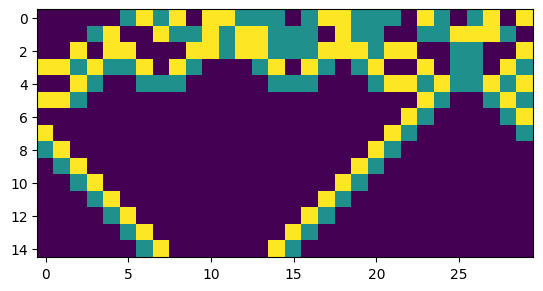

In [8]:
plt.imshow(sandpile.grid_plotter())

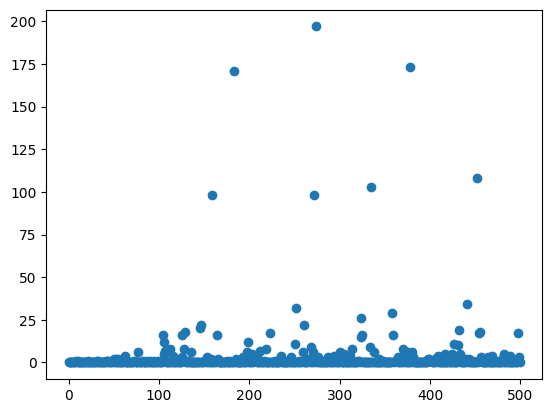

In [8]:
plt.scatter(np.arange(len(sandpile.data)), sandpile.data)